\begin{equation}
\frac{d^2y}{dt^2} + \gamma \frac{dy}{dt} + \omega² y =0
\end{equation}


\begin{equation}
\frac{\mathrm{d}y}{\mathrm{d}t} =v
\end{equation}


\begin{equation}
\frac{\mathrm{d}v}{\mathrm{d}t} = - \gamma v - \omega² y
\end{equation}

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [ ]:
# prompt: generar grafias del tiempo como funcion de la  posY, y del tiempo como funci nde la VelY, asegurate de tener los ejes con un fontize de 14 y etiquetar con las unidades adecuadas los label, llama la librera como matplotib como plots, quiero que las figutras este en un subplot i tuliza los metodos para las graficas ax, fig
def graficas(t, posY, vel):
  fig, ax = plots.subplots(2, 1, figsize=(6, 4))
  # Grafica de posición vs tiempo
  ax[0].plot(t, posY)
  ax[0].set_xlabel("Tiempo (s)", fontsize=14)
  ax[0].set_ylabel("Posición (m)", fontsize=14)
  ax[0].set_title("Posición vs Tiempo", fontsize=14)
  # Grafica de velocidad vs tiempo
  ax[1].plot(t, vel)
  ax[1].set_xlabel("Tiempo (s)", fontsize=14)
  ax[1].set_ylabel("Velocidad (m/s)", fontsize=14)
  ax[1].set_title("Velocidad vs Tiempo", fontsize=14)
  plots.tight_layout()
  plots.show()


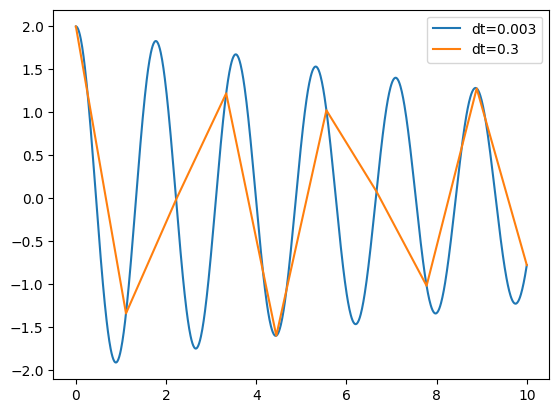

In [ ]:
def func(y, t, omega, alpha):
    position = y[0]
    velocity = y[1]
    dydt = velocity
    dvdt = -alpha*velocity - omega*position
    return np.array([dydt, dvdt])
# =======================
# Condciones iniciales
# =======================
y0 = np.array([2, 0])
f=2 #Hz
omega = 2*np.pi*f
alpha = 0.1
t0 = np.linspace(0, 10, 100000)
t1 = np.linspace(0, 10, 1000)
t2 = np.linspace(0, 10, 10)
dt2 = 3/10
dt1 = 3/1000
# =======================
params = (omega, alpha)
solutionED0 = odeint(func, y0, t0, args=params)
solutionED1 = odeint(func, y0, t1, args=params)
solutionED2 = odeint(func, y0, t2, args=params)

plots.plot(t1, solutionED1[:,0], label=f"dt={dt1}")
plots.plot(t2,solutionED2[:,0], label=f"dt={dt2}")
plots.legend()
plots.show()

In [ ]:
# prompt: quiero tener un parametro alpha que pueda variar  la grafica  dinamicamente, qeu se realiza la actualizacion empleand algunas widget, revisa este codigo por favor # Condciones iniciales
# # =======================
# y0 = np.array([2, 0])
# f=2 #Hz
# omega = 2*np.pi*f
# alpha = 0.1
# t = np.linspace(0, 3, 1000)
# # =======================
# params = (omega, alpha)
# solutionED = odeint(func, y0, t, args=params)
# posY = solutionED[:,0]
# vel = solutionED[:,1]
# graficas(t, posY, vel)

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from ipywidgets import interact, FloatSlider

# Define the differential equations
def func(y, t, omega, alpha):
    position = y[0]
    velocity = y[1]
    dydt = velocity
    dvdt = -alpha * velocity - omega * omega * position  # Corrected omega term
    return np.array([dydt, dvdt])

# Define the plotting function
def graficas(t, posY, vel, alpha_val):
    fig, ax = plt.subplots(2, 1, figsize=(8, 6))  # Increased figure size

    ax[0].plot(t, posY, label=f'alpha = {alpha_val}')
    ax[0].set_xlabel("Tiempo (s)", fontsize=12)
    ax[0].set_ylabel("Posición (m)", fontsize=12)
    ax[0].set_title("Posición vs Tiempo", fontsize=14)
    ax[0].legend()
    ax[0].grid(True)  # Added grid

    ax[1].plot(t, vel, label=f'alpha = {alpha_val}')
    ax[1].set_xlabel("Tiempo (s)", fontsize=12)
    ax[1].set_ylabel("Velocidad (m/s)", fontsize=12)
    ax[1].set_title("Velocidad vs Tiempo", fontsize=14)
    ax[1].legend()
    ax[1].grid(True)  # Added grid

    plt.tight_layout()
    plt.show()

# Interactive plot
def update_plot(alpha_val=0.1):
    params = (omega, alpha_val)
    solutionED = odeint(func, y0, t, args=params)
    posY = solutionED[:, 0]
    vel = solutionED[:, 1]
    graficas(t, posY, vel, alpha_val)




In [ ]:
# Initial conditions
y0 = np.array([2, 0])
f = 2  # Hz
omega = 2 * np.pi * f
t = np.linspace(0, 3, 1000)
interact(update_plot, alpha_val=FloatSlider(min=0, max=10, step=0.1, value=0.1, description="Alpha:"));


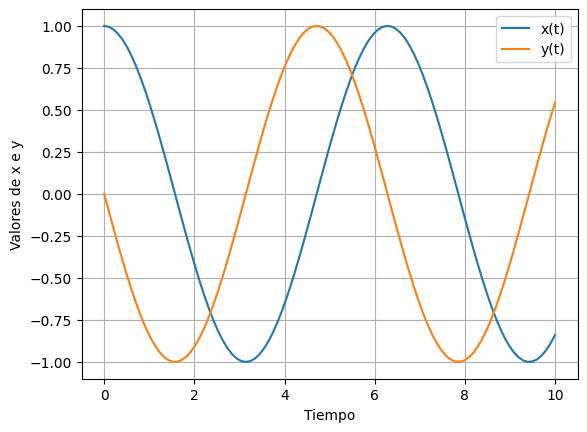

In [4]:
def sistema(vars, t):
    x, y = vars  # Descomponer el vector de entrada
    dxdt = y
    dydt = -x
    return [dxdt, dydt]

# Condiciones iniciales
condiciones_iniciales = [1, 0]
t = np.linspace(0, 10, 100)

# Resolver el sistema
solucion = odeint(sistema, condiciones_iniciales, t)

# Graficar
plt.plot(t, solucion[:, 0], label='x(t)')
plt.plot(t, solucion[:, 1], label='y(t)')
plt.xlabel('Tiempo')
plt.ylabel('Valores de x e y')
plt.legend()
plt.grid()
plt.show()